# Introduction
## Importing the data and libraries
in this notebook we are tackling a kaggles playground comppitition called (Interovert Vs Extrovert). be aware that this compitition has crossed the deadline by now.
well lets start with explaining the types of personality. as you know there are three types of personality do to social tendency in people(Extrovert,Ambivert and Introvert)
if you look at the dataframe 'mydata' head you can see there are just two of these types in the dataset(Extrovert and Introvert) and there is no sign of "Ambivert" in there.
we can see the data has(18524 rows x 8 columns) and  predicted the type  of personality due to these features
(
Time_spent_Alone --> from 0 to 11
Stage_fear	--> binary Yes or No 
Social_event_attendance	 --> from 0 to 10
Going_outside --> from 0 to 7
Drained_after_socializing --> binary Yes or No	
Friends_circle_size --> from 0 to 15
Post_frequency --> from 0 to 10
)
number of missing value for all columns(null count) is 9196 and its balanced between all features but the question we can think about here is:
is it equel in target variables two?
how many of these participant are Extrovert or Introver?
what is the exact relation between Target variable and each feature?
and so many other questions wich will come up to us as we are aswearing these...
so lets start EDA and do some visualization.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pwd

'd:\\python\\kaggle\\inroverse verss extroverces\\.vscode'

In [3]:
mydata = pd.read_csv('../playground-series-s5e7/train.csv',index_col = False)

In [4]:
mydata.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [5]:
mydata.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
mydata.value_counts()

id     Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  Drained_after_socializing  Friends_circle_size  Post_frequency  Personality
18523  1.0               No          8.0                      6.0            No                         4.0                  7.0             Extrovert      1
0      0.0               No          6.0                      4.0            No                         15.0                 5.0             Extrovert      1
1      1.0               No          7.0                      3.0            No                         10.0                 8.0             Extrovert      1
3      3.0               No          7.0                      3.0            No                         11.0                 5.0             Extrovert      1
7      2.0               No          8.0                      3.0            No                         4.0                  5.0             Extrovert      1
                                                         

In [7]:
mydata.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [8]:
mydata.isnull().sum().sum()

np.int64(9196)

# Exploratory Data Analysis (EDA)
## Visualization
oops we can see a high Target imbalance in the data and thats one of the important things we have to consider in our model training.


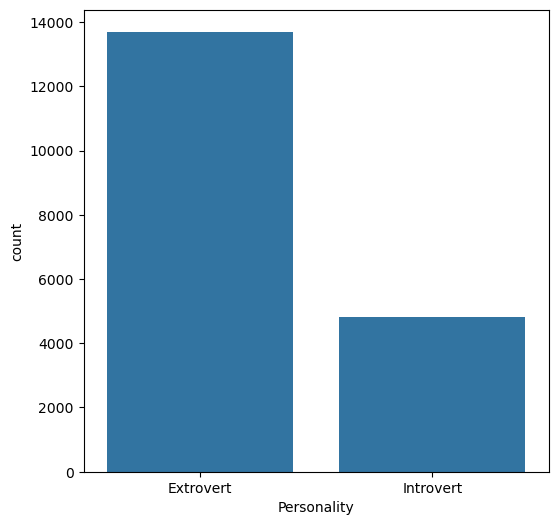

In [9]:
fig = plt.figure(figsize=(6,6),dpi = 100)
sns.barplot(mydata.Personality.value_counts())

fig.savefig('targervalue_imbalance.png')

# Time_spent_Alone	

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\1497605637.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=ax2)


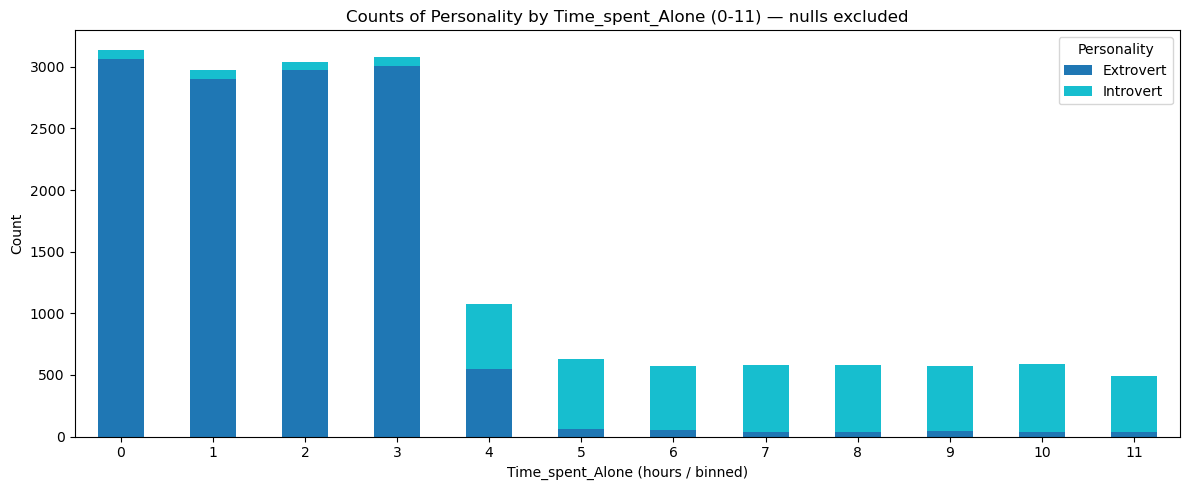

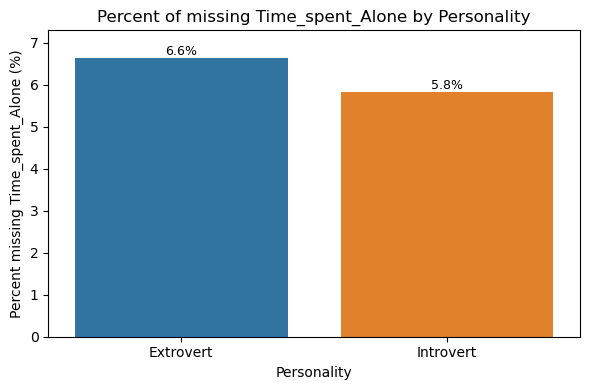

In [10]:
# visualize relationship between Time_spent_Alone (0-11) and Personality,
# and visualize prevalence of nulls in Time_spent_Alone per Personality.

# 1) stacked counts per Time_spent_Alone (0-11) excluding nulls
ts = mydata['Time_spent_Alone'].dropna().astype(int)  # exclude nulls and convert to int bins
pivot = pd.crosstab(ts, mydata.loc[ts.index, 'Personality']).reindex(range(0, 12), fill_value=0)

fig_time, ax = plt.subplots(figsize=(12,5), dpi=100)
pivot.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
ax.set_title('Counts of Personality by Time_spent_Alone (0-11) — nulls excluded')
ax.set_xlabel('Time_spent_Alone (hours / binned)')
ax.set_ylabel('Count')
ax.legend(title='Personality')
plt.xticks(rotation=0)
plt.tight_layout()
fig_time.savefig('time_spent_alone_personality_counts.png')

# 2) prevalence of null Time_spent_Alone in each Personality type
missing_df = mydata.assign(missing=mydata['Time_spent_Alone'].isnull())
summary = missing_df.groupby('Personality')['missing'].agg(total_missing='sum', total='count').reset_index()
summary['percent_missing'] = 100 * summary['total_missing'] / summary['total']

fig_missing, ax2 = plt.subplots(figsize=(6,4), dpi=100)
sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=ax2)
ax2.set_ylim(0, summary['percent_missing'].max() * 1.1)
ax2.set_ylabel('Percent missing Time_spent_Alone (%)')
ax2.set_title('Percent of missing Time_spent_Alone by Personality')

# annotate bars
for p, pct in zip(ax2.patches, summary['percent_missing']):
    ax2.annotate(f"{pct:.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
fig_missing.savefig('timespent_missing_by_personality.png')

# show the plots inline
plt.show()

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\1015057415.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=axes[1])


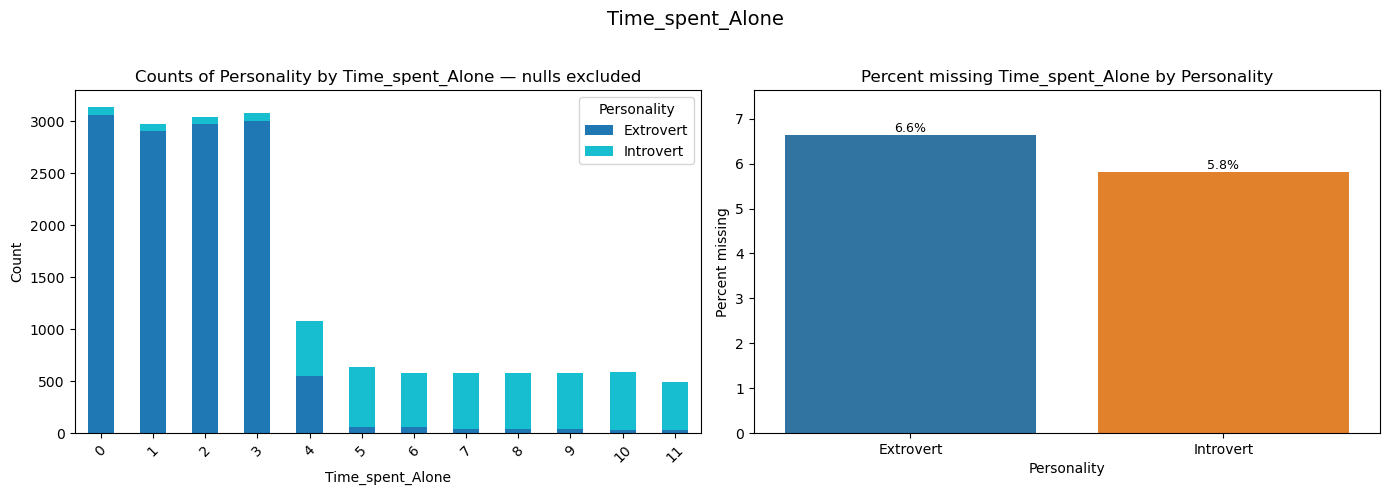

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\1015057415.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=axes[1])


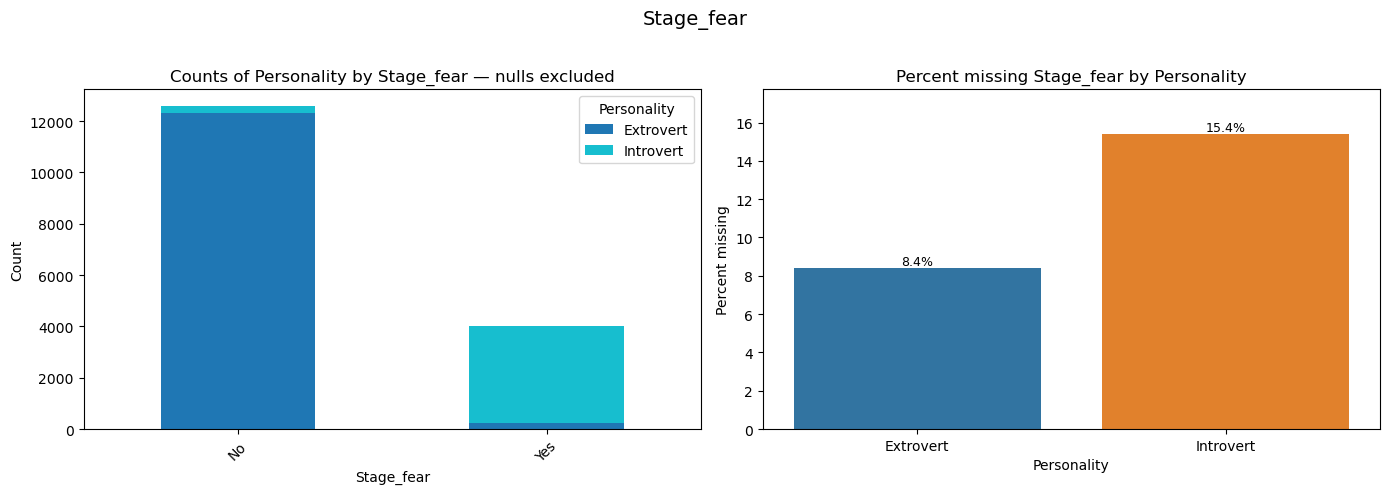

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\1015057415.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=axes[1])


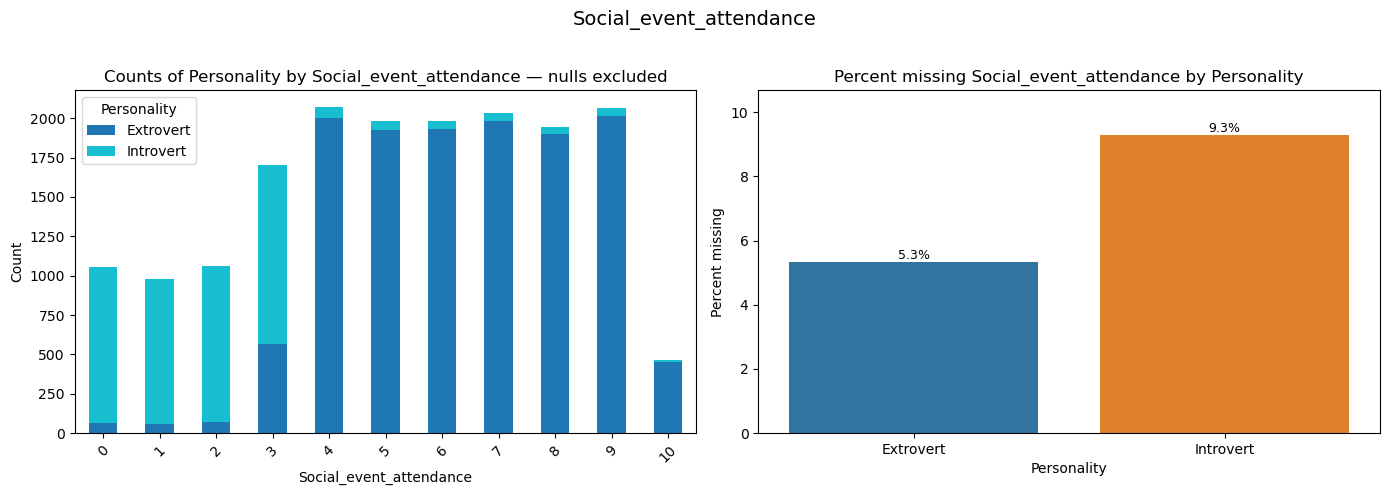

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\1015057415.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=axes[1])


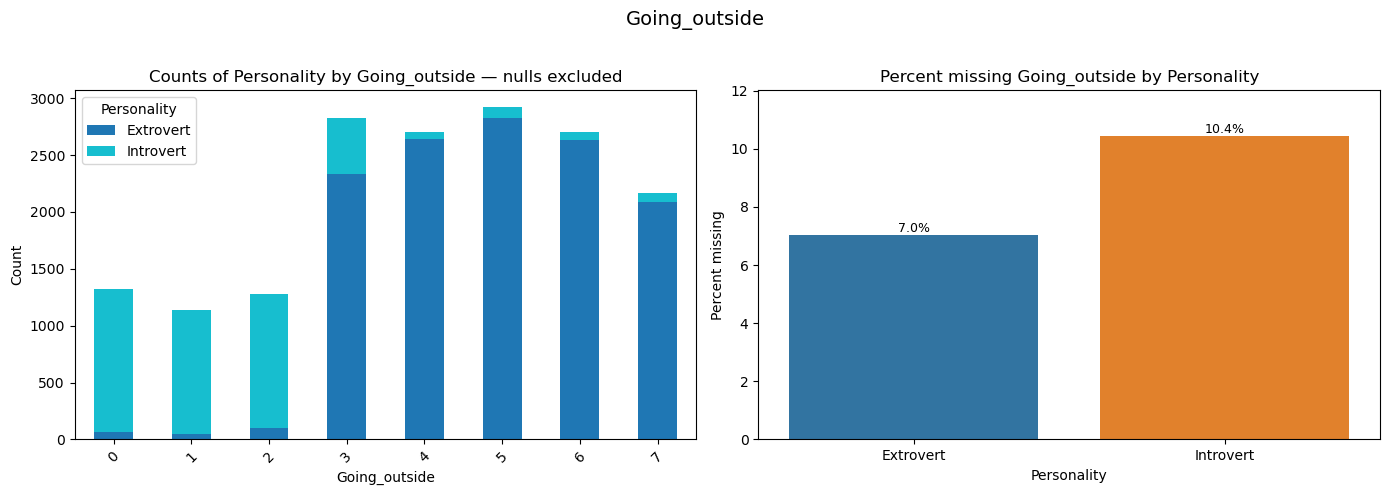

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\1015057415.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=axes[1])


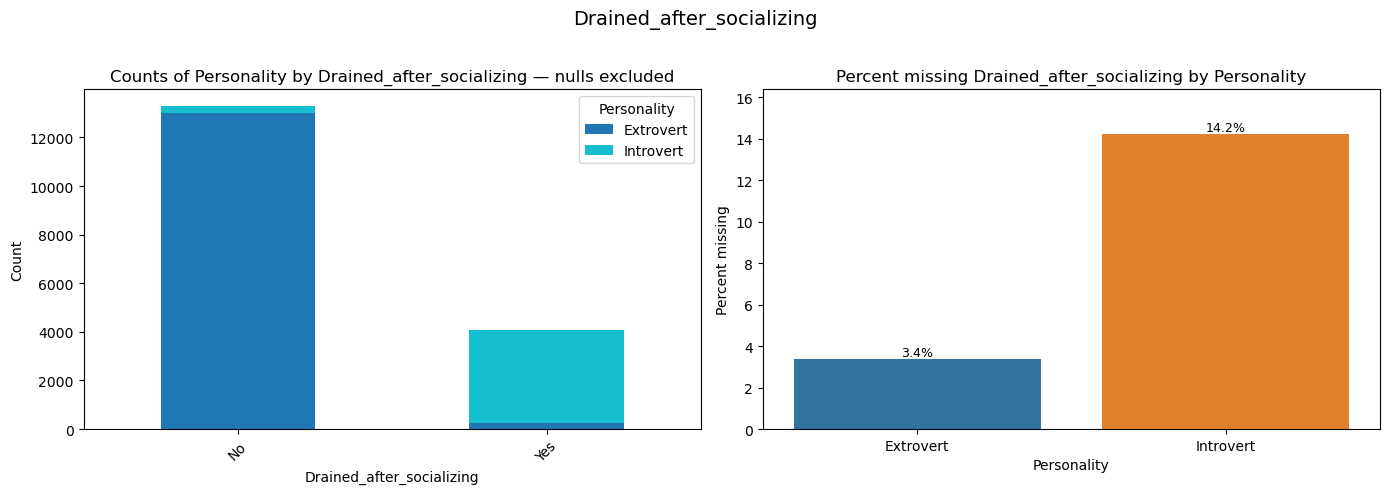

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\1015057415.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=axes[1])


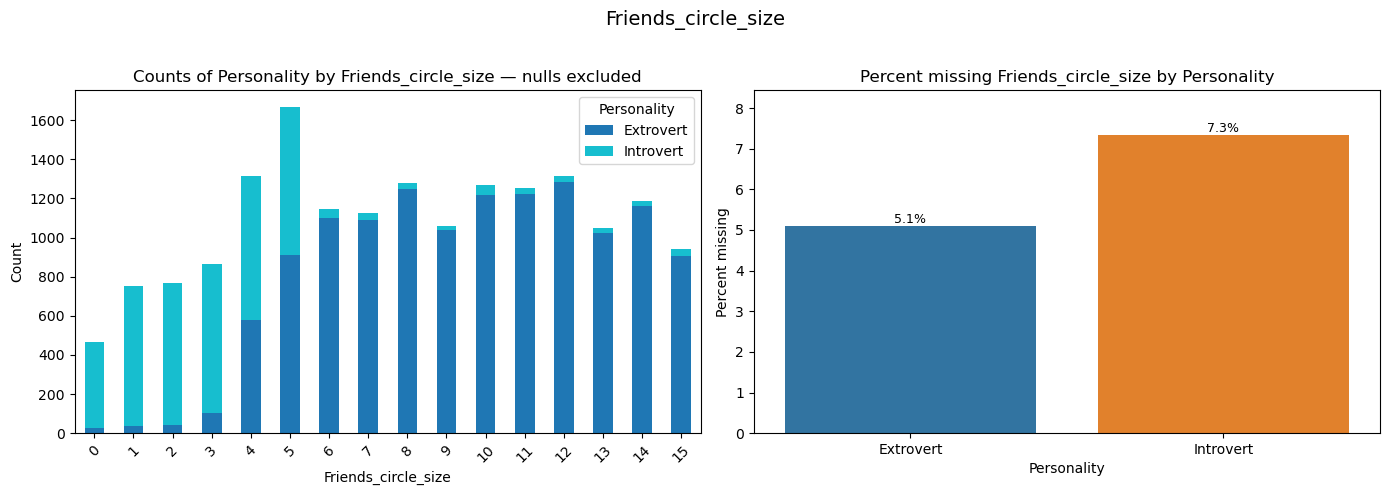

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\1015057415.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=axes[1])


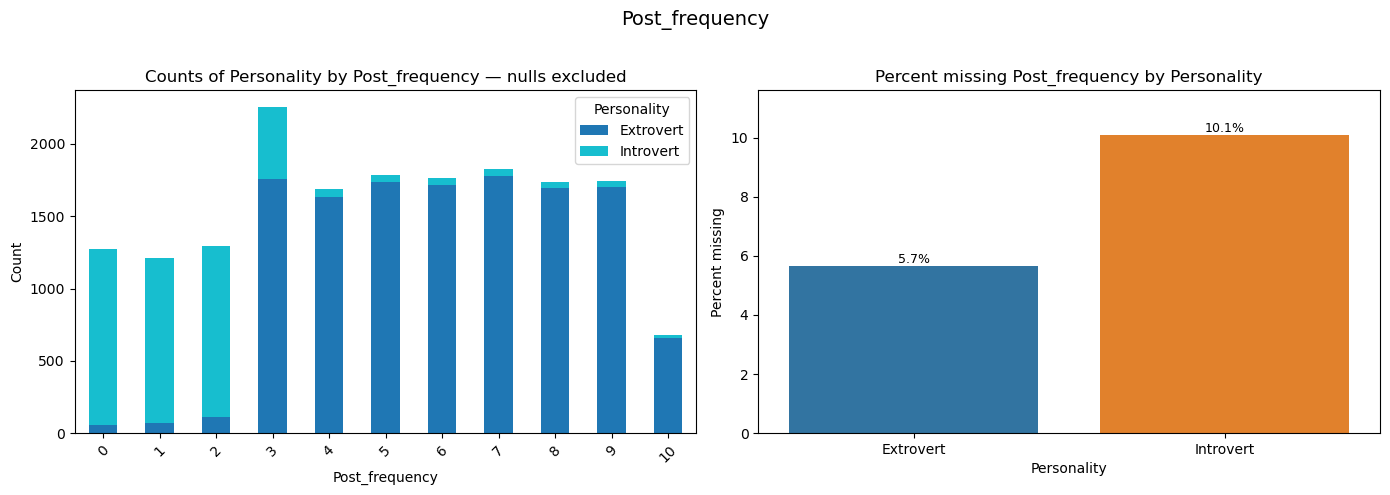

In [11]:
# visualize counts (nulls excluded) and percent-missing by Personality for specified columns
cols_info = {
    'Time_spent_Alone': range(0, 12),
    'Stage_fear': None,
    'Social_event_attendance': range(0, 11),
    'Going_outside': range(0, 8),
    'Drained_after_socializing': None,
    'Friends_circle_size': range(0, 16),
    'Post_frequency': range(0, 11),
}

for col, rng in cols_info.items():
    # 1) stacked counts per value (exclude nulls)
    nonnull = mydata[col].dropna()
    # convert numeric ranges to int bins when applicable
    if rng is not None:
        s = nonnull.astype(int)
        pivot = pd.crosstab(s, mydata.loc[s.index, 'Personality']).reindex(rng, fill_value=0)
    else:
        s = nonnull.astype(str)
        pivot = pd.crosstab(s, mydata.loc[s.index, 'Personality'])
        # keep a stable order for binary columns if both present
        if set(pivot.index) >= {'Yes', 'No'}:
            pivot = pivot.reindex(['No', 'Yes']).fillna(0)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=100)

    # stacked bar count plot
    pivot.plot(kind='bar', stacked=True, ax=axes[0], colormap='tab10')
    axes[0].set_title(f'Counts of Personality by {col} — nulls excluded')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    axes[0].legend(title='Personality')
    axes[0].tick_params(axis='x', rotation=45)

    # 2) percent missing per Personality for this column
    missing_df = mydata.assign(missing=mydata[col].isnull())
    summary = missing_df.groupby('Personality').agg(total_missing=('missing', 'sum'),
                                                   total=('missing', 'count')).reset_index()
    summary['percent_missing'] = 100 * summary['total_missing'] / summary['total']

    sns.barplot(data=summary, x='Personality', y='percent_missing', palette='tab10', ax=axes[1])
    axes[1].set_ylim(0, summary['percent_missing'].max() * 1.15 if summary['percent_missing'].max() > 0 else 1)
    axes[1].set_ylabel('Percent missing')
    axes[1].set_title(f'Percent missing {col} by Personality')

    # annotate percent bars
    for p, pct in zip(axes[1].patches, summary['percent_missing']):
        axes[1].annotate(f"{pct:.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='bottom', fontsize=9)

    plt.suptitle(col, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig.savefig(f'{col}_personality_counts_and_missing.png')
    plt.show()

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\157349873.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=miss_summary, x='Personality', y='percent_missing_any', palette='tab10', ax=ax1)


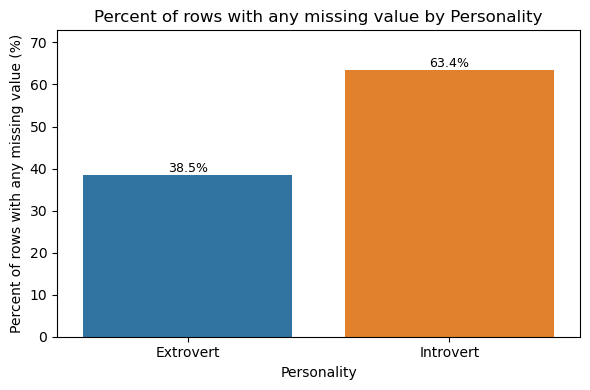

C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\157349873.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_counts, x='Personality', y='count', palette='tab10', ax=ax2)


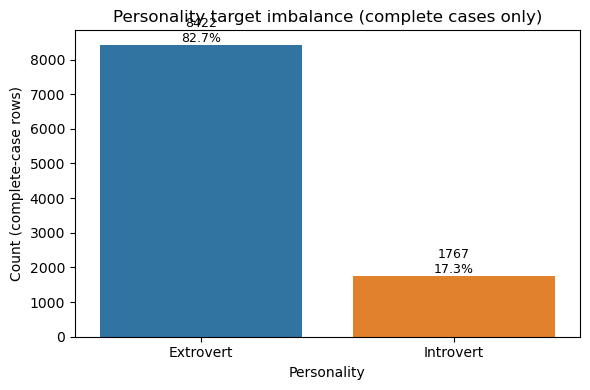

In [12]:
# Plot 1: percent of rows with ANY missing value, by Personality
missing_any = mydata.isnull().any(axis=1)
miss_summary = mydata.assign(missing_any=missing_any).groupby('Personality').agg(
    total=('missing_any', 'count'),
    missing_count=('missing_any', 'sum')
).reset_index()
miss_summary['percent_missing_any'] = 100 * miss_summary['missing_count'] / miss_summary['total']

fig1, ax1 = plt.subplots(figsize=(6,4), dpi=100)
sns.barplot(data=miss_summary, x='Personality', y='percent_missing_any', palette='tab10', ax=ax1)
ax1.set_ylim(0, miss_summary['percent_missing_any'].max() * 1.15)
ax1.set_ylabel('Percent of rows with any missing value (%)')
ax1.set_title('Percent of rows with any missing value by Personality')
for p, pct in zip(ax1.patches, miss_summary['percent_missing_any']):
    ax1.annotate(f"{pct:.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=9)
plt.tight_layout()
fig1.savefig('percent_missing_any_by_personality.png')
plt.show()

# Plot 2: Target imbalance excluding rows that contain any nulls (i.e., only complete cases)
clean = mydata.dropna()  # remove rows with any nulls
target_counts = clean['Personality'].value_counts().reset_index()
target_counts.columns = ['Personality', 'count']
target_counts['percent'] = 100 * target_counts['count'] / target_counts['count'].sum()

fig2, ax2 = plt.subplots(figsize=(6,4), dpi=100)
sns.barplot(data=target_counts, x='Personality', y='count', palette='tab10', ax=ax2)
ax2.set_ylabel('Count (complete-case rows)')
ax2.set_title('Personality target imbalance (complete cases only)')
for p, cnt, pct in zip(ax2.patches, target_counts['count'], target_counts['percent']):
    ax2.annotate(f"{cnt}\n{pct:.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=9)
plt.tight_layout()
fig2.savefig('target_imbalance_complete_cases.png')
plt.show()

# EDA RESULTS
as you can see each column with continues value can be seperated to the three part(Extrovert,Micture of two values,Introvert)
and if we take a look at the (missing value and Target calss imbalance) percentage for each Target we can say despite the fact that 
82 percent of our data in covering Extrovert our missing value is almost 63 percent covered by Introvert. we hve to consider than in 
handeling missing value and i think the most important challenge in this compitition is abou how you choose to aprouch to this problem.
## Missing value handeling dou to the EDA Results
lets see what we can do and choose the best Aprouch:
1. filling the missing values using with average of each column(eeeeeeewwwww Aprouch)
2. filling the missing values using 'Personality' column (overfitting aprouch) 
3. filling the missing values using mean() of each continues column (so whats the point of data visualizing?)
4. filling the missing values using other columns results by converting them to Labels and getting the most common type of personality in that row(its a good way but not the best)
5. if we take a look at the data we can see there are a few rows wich we cannot fill them with non of these aprouchs because they ara almost empty.after i took a look at leaderbord of the competition i realized that those few rows are determiner the winner of the compotition.so what should we do?(we cant win but thats not the reason to not trying your best!)
i think its better to keep risky rows to fill them in the end.
at first i will create a label column for each coulmn and fill those with this three values(Extrovert,Ambivert,Introvert) due to the common range for each one(yes im adding a new variable'Ambivert' because its triky if i consider some range of some column value as Extrovert or Introvert considering there value_counts are so close in that range.)like this:
### Time_spent_Alone --> Extrovert(0,1,2,3),Ambivert(4),Introvert(5,6,7,8,9,10,11)
### Social_event_attendance  --> Extrovert(4,5,6,7,8,9,10),Ambivert(3),Introvert(0,1,2)
### Going_outside --> Extrovert(4,5,6,7),Ambivert(3),Introvert(0,1,2)
### Friends_circle_size --> Extrovert(6,7,8,9,10,11,12,13,14,15),Ambivert(4,5),Introvert(0,1,2,3)
### Post_frequency -->  Extrovert(4,5,6,7,8,9,10),Ambivert(3),Introvert(0,1,2)
we will start with creating a ranged base label for each continues column and assign that to the new columns(label columns).
# 6. i did a search and i realized there is a better aprouch and that is to create a model from (mydata.dropna()) column to predict nulls is mydata lets see if we can do it.
i will do both ways and at the end i will compare two model with each other after that we can see wich one is the better aprouch. i think it depends on the data and the end but lets see what will hapend. it is getting interesting.

In [13]:
# create labeled columns for the specified continuous features without touching NaNs
mappings = {
    'Time_spent_Alone': {
        'Extrovert': set([0,1,2,3]),
        'Ambivert': set([4]),
        'Introvert': set(range(5,12)),
    },
    'Social_event_attendance': {
        'Extrovert': set(range(4,11)),
        'Ambivert': set([3]),
        'Introvert': set([0,1,2]),
    },
    'Going_outside': {
        'Extrovert': set(range(4,8)),
        'Ambivert': set([3]),
        'Introvert': set([0,1,2]),
    },
    'Friends_circle_size': {
        'Extrovert': set(range(6,16)),
        'Ambivert': set([4,5]),
        'Introvert': set([0,1,2,3]),
    },
    'Post_frequency': {
        'Extrovert': set(range(4,11)),
        'Ambivert': set([3]),
        'Introvert': set([0,1,2]),
    },
}

for col, groups in mappings.items():
    newcol = f"{col}_labeled"
    s = mydata[col]

    def label_val(x):
        if pd.isna(x):
            return np.nan
        xi = int(x)
        if xi in groups['Extrovert']:
            return 'Extrovert'
        if xi in groups['Ambivert']:
            return 'Ambivert'
        if xi in groups['Introvert']:
            return 'Introvert'
        return np.nan

    mydata[newcol] = s.apply(label_val)


In [14]:
mydata.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Time_spent_Alone_labeled,Social_event_attendance_labeled,Going_outside_labeled,Friends_circle_size_labeled,Post_frequency_labeled
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,Extrovert,Extrovert,Ambivert,Extrovert,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,Introvert,Introvert,Introvert,Introvert,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,Extrovert,Extrovert,Ambivert,Extrovert,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,NaN


In [15]:
# for binary columns its much easier

In [16]:
# create labeled columns for binary features without touching NaNs
bin_mappings = {
    'Stage_fear': {'Yes': 'Introvert', 'No': 'Extrovert'},
    'Drained_after_socializing': {'Yes': 'Introvert', 'No': 'Extrovert'},
}

for col, mp in bin_mappings.items():
    newcol = f"{col}_labeled"
    # pandas.Series.map preserves NaN values, so nulls remain untouched
    mydata[newcol] = mydata[col].map(mp)

In [17]:
mydata.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Time_spent_Alone_labeled,Social_event_attendance_labeled,Going_outside_labeled,Friends_circle_size_labeled,Post_frequency_labeled,Stage_fear_labeled,Drained_after_socializing_labeled
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,Extrovert,Extrovert,Ambivert,Extrovert,Extrovert,Extrovert,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,Introvert,Introvert,Introvert,Introvert,Introvert,Introvert,NaN
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,Extrovert,Extrovert,Ambivert,Extrovert,Extrovert,Extrovert,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,NaN,Extrovert,Extrovert


# seperating risky rows 
in this part i like to seperate columns with less than 3 Introvert and Extrovert values and call them : risky_rows
im going to fill all missing values  with the most common type of personality according to labeled columns except the missing values in risky_row.
though we have to check multicolliniarity to avoid overfitting model and ourselves judgment.  

In [18]:
# find rows with less than 4 "Extrovert" OR less than 4 "Introvert" across columns ending with '_labeled'
labeled_cols = [c for c in mydata.columns if c.endswith('_labeled')]

# compute per-row counts
counts = mydata[labeled_cols].eq('Extrovert').sum(axis=1).rename('Extrovert_count').to_frame()
counts['Introvert_count'] = mydata[labeled_cols].eq('Introvert').sum(axis=1)

# mask rows where either count is < 4
mask = (counts['Extrovert_count'] < 4) | (counts['Introvert_count'] < 4)

# extract matching rows and attach the counts for inspection
filtered_rows = mydata[mask].copy()
filtered_rows = filtered_rows.join(counts[mask])

print(f"Found {filtered_rows.shape[0]} rows with <4 Extrovert or <4 Introvert across {len(labeled_cols)} labeled columns")

Found 18524 rows with <4 Extrovert or <4 Introvert across 7 labeled columns


In [19]:
risky_rows =  filtered_rows[(filtered_rows['Extrovert_count'] < 3) & (filtered_rows['Introvert_count'] < 3)]

In [20]:
risky_rows

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Time_spent_Alone_labeled,Social_event_attendance_labeled,Going_outside_labeled,Friends_circle_size_labeled,Post_frequency_labeled,Stage_fear_labeled,Drained_after_socializing_labeled,Extrovert_count,Introvert_count
372,372,4.0,Yes,3.0,3.0,Yes,4.0,3.0,Introvert,Ambivert,Ambivert,Ambivert,Ambivert,Ambivert,Introvert,Introvert,0,2
868,868,0.0,Yes,5.0,3.0,Yes,5.0,3.0,Introvert,Extrovert,Extrovert,Ambivert,Ambivert,Ambivert,Introvert,Introvert,2,2
945,945,10.0,No,3.0,3.0,No,5.0,3.0,Extrovert,Introvert,Ambivert,Ambivert,Ambivert,Ambivert,Extrovert,Extrovert,2,1
1059,1059,3.0,NaN,3.0,3.0,No,5.0,3.0,Extrovert,Extrovert,Ambivert,Ambivert,Ambivert,Ambivert,NaN,Extrovert,2,0
2214,2214,4.0,No,3.0,3.0,No,4.0,2.0,Extrovert,Ambivert,Ambivert,Ambivert,Ambivert,Introvert,Extrovert,Extrovert,2,1
2651,2651,NaN,Yes,3.0,3.0,NaN,4.0,2.0,Introvert,NaN,Ambivert,Ambivert,Ambivert,Introvert,Introvert,NaN,0,2
2809,2809,0.0,NaN,9.0,2.0,NaN,5.0,2.0,Extrovert,Extrovert,Extrovert,Introvert,Ambivert,Introvert,NaN,NaN,2,2
3760,3760,NaN,NaN,3.0,5.0,No,3.0,2.0,Extrovert,NaN,Ambivert,Extrovert,Introvert,Introvert,NaN,Extrovert,2,2
6066,6066,2.0,Yes,3.0,3.0,NaN,5.0,0.0,Extrovert,Extrovert,Ambivert,Ambivert,Ambivert,Introvert,Introvert,NaN,1,2
6483,6483,NaN,NaN,9.0,3.0,No,5.0,3.0,Extrovert,NaN,Extrovert,Ambivert,Ambivert,Ambivert,NaN,Extrovert,2,0


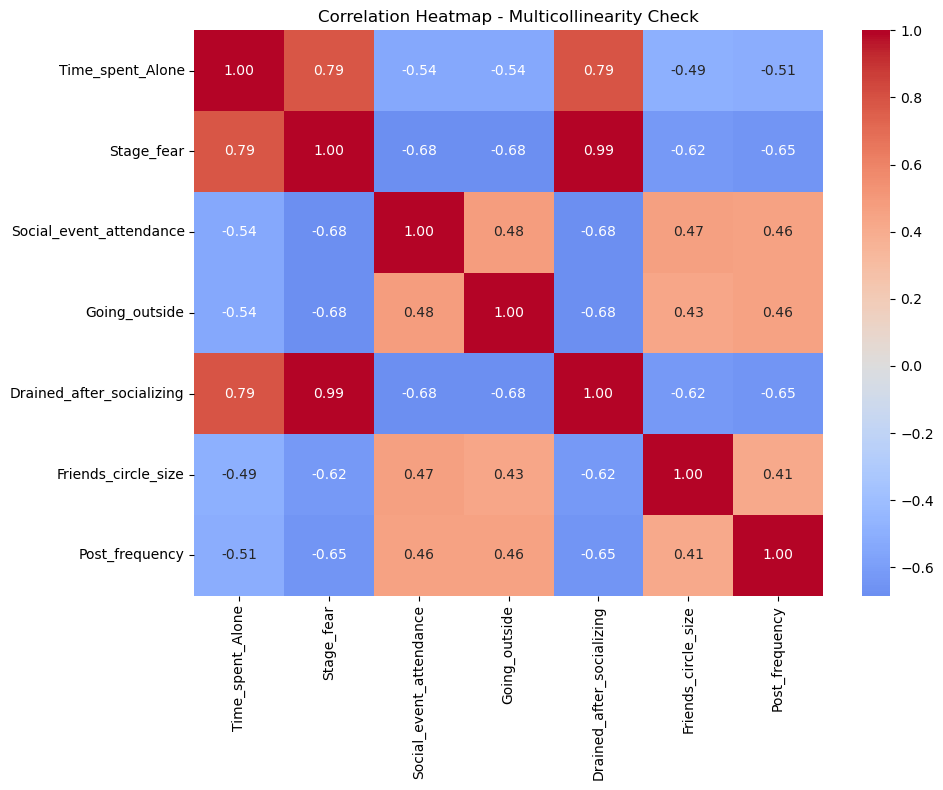

In [21]:
# Create a copy and prepare for correlation analysis
mydata_copy = mydata.copy()

# Drop rows with null values
mydata_copy = mydata_copy.dropna()

# Drop labeled columns
labeled_cols_to_drop = [c for c in mydata_copy.columns if c.endswith('_labeled')]
mydata_copy = mydata_copy.drop(columns=labeled_cols_to_drop)

# Drop non-numeric columns (id, Personality)
mydata_copy = mydata_copy.drop(columns=['id', 'Personality'])

# Replace binary column values with numbers
mydata_copy['Stage_fear'] = mydata_copy['Stage_fear'].map({'Yes': 1, 'No': 0})
mydata_copy['Drained_after_socializing'] = mydata_copy['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
sns.heatmap(mydata_copy.corr(), annot=True, cmap='coolwarm', center=0, ax=ax, fmt='.2f')
ax.set_title('Correlation Heatmap - Multicollinearity Check')
plt.tight_layout()
fig.savefig('correlation_heatmap.png')
plt.show()

In [22]:
mydata_not_null = mydata.dropna()

In [23]:
mydata_not_null = mydata_not_null.drop(columns = ['Personality', 'Time_spent_Alone_labeled', 'Social_event_attendance_labeled', 'Going_outside_labeled', 'Friends_circle_size_labeled', 'Post_frequency_labeled', 'Stage_fear_labeled', 'Drained_after_socializing_labeled'])

In [24]:

mydata_not_null['Stage_fear'] = mydata_not_null['Stage_fear'].replace({'No': 0, 'Yes': 1})
mydata_not_null['Drained_after_socializing'] = mydata_not_null['Drained_after_socializing'].replace({'No': 0, 'Yes': 1})


C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\4215226263.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mydata_not_null['Stage_fear'] = mydata_not_null['Stage_fear'].replace({'No': 0, 'Yes': 1})
C:\Users\OneX\AppData\Local\Temp\ipykernel_18816\4215226263.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mydata_not_null['Drained_after_socializing'] = mydata_not_null['Drained_after_socializing'].replace({'No': 0, 'Yes': 1})


In [25]:
cols_to_drop = ['Personality', 'Time_spent_Alone_labeled', 'Social_event_attendance_labeled', 
                'Going_outside_labeled', 'Friends_circle_size_labeled', 'Post_frequency_labeled', 
                'Stage_fear_labeled', 'Drained_after_socializing_labeled']

existing_cols = [col for col in cols_to_drop if col in mydata.columns]
mydata_just_null = mydata.drop(columns=existing_cols)

In [26]:
# Filter mydata_just_null to keep only rows with at least one null value (i.e., rows that would be dropped by dropna())
mydata_just_nulls = mydata_just_null[mydata_just_null.isnull().any(axis=1)].copy()

we have to do this
use the 'mydata_not_null' and create a randomforest model wich can guess the null values for each column considering other columns. do not forget to do the hyperparametr tuning for the model and be aware the two binary columns in the dataraframe are corrolated with each other 99%.
after that we will tell the model to predict the null values in mydata_just_null.
and then we can merge the dataframes with eachother and create the one final model.


In [27]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, r2_score
import warnings

warnings.filterwarnings('ignore')

# Prepare the complete data (mydata_not_null)
X_complete = mydata_not_null.drop(columns=['id'])

# Dictionary to store trained models for each column
imputation_models = {}

# Columns to predict (excluding 'id')
columns_to_predict = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 
                     'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 
                     'Post_frequency']

print("Training imputation models for each column...\n")
print("="*80)

for target_col in columns_to_predict:
    print(f"\n>>> Training model for: {target_col}")
    
    # Prepare features (all columns except target and id)
    feature_cols = [c for c in X_complete.columns if c != target_col]
    X = X_complete[feature_cols]
    y = X_complete[target_col]
    
    # Due to high correlation between binary columns, drop one if predicting the other
    if target_col == 'Drained_after_socializing' and 'Stage_fear' in feature_cols:
        X = X.drop(columns=['Stage_fear'])
        print(f"  Note: Dropped 'Stage_fear' due to 99% correlation")
    elif target_col == 'Stage_fear' and 'Drained_after_socializing' in feature_cols:
        X = X.drop(columns=['Drained_after_socializing'])
        print(f"  Note: Dropped 'Drained_after_socializing' due to 99% correlation")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Choose model type based on column
    if target_col in ['Stage_fear', 'Drained_after_socializing']:
        # Binary classification
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
        model = RandomForestClassifier(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=0)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        print(f"  Best parameters: {grid_search.best_params_}")
        print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print(f"\n  Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))
        
    else:
        # Regression for continuous variables
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
        model = RandomForestRegressor(random_state=42, n_jobs=-1)
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        
        print(f"  Best parameters: {grid_search.best_params_}")
        print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
        print(f"  R² Score: {r2_score(y_test, y_pred):.4f}")
    
    # Store the model
    imputation_models[target_col] = {
        'model': best_model,
        'features': list(X.columns)
    }
    print("-"*80)

print("\n✓ All imputation models trained successfully!")

Training imputation models for each column...


>>> Training model for: Time_spent_Alone
  Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
  RMSE: 1.6150
  R² Score: 0.6010
--------------------------------------------------------------------------------

>>> Training model for: Stage_fear
  Note: Dropped 'Drained_after_socializing' due to 99% correlation
  Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
  Accuracy: 0.9956

  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1710
           1       0.98      0.99      0.99       328

    accuracy                           1.00      2038
   macro avg       0.99      0.99      0.99      2038
weighted avg       1.00      1.00      1.00      2038

--------------------------------------------------------------------------------

>>> Training model for: Socia

In [28]:
mydata_just_nulls.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
dtype: int64

In [29]:
# Iteratively impute mydata_just_nulls using the per-column best models (imputation_models),
# starting from the column with the fewest nulls.

df_imp = mydata_just_nulls.copy()

# Order columns by ascending number of NaNs
null_counts = df_imp[columns_to_predict].isna().sum().sort_values()
ordered_cols = list(null_counts.index)

# Helper: prepare feature matrix to match model training (map Yes/No -> 1/0)
def make_features(df, feat_cols):
    Xf = df[feat_cols].copy()
    if 'Stage_fear' in Xf.columns and Xf['Stage_fear'].dtype == object:
        Xf['Stage_fear'] = Xf['Stage_fear'].map({'No': 0, 'Yes': 1})
    if 'Drained_after_socializing' in Xf.columns and Xf['Drained_after_socializing'].dtype == object:
        Xf['Drained_after_socializing'] = Xf['Drained_after_socializing'].map({'No': 0, 'Yes': 1})
    return Xf

# Valid ranges for regression targets (to round/clip)
valid_ranges = {
    'Time_spent_Alone': (0, 11),
    'Social_event_attendance': (0, 10),
    'Going_outside': (0, 7),
    'Friends_circle_size': (0, 15),
    'Post_frequency': (0, 10),
}
bin_cols = {'Stage_fear', 'Drained_after_socializing'}

# Iterate until no more changes or max passes
max_passes = 5
for p in range(max_passes):
    filled_in_pass = 0
    for col in ordered_cols:
        if col not in imputation_models:
            continue  # skip if no model stored (shouldn't happen)

        # rows needing prediction for this column
        need_idx = df_imp[col].isna()
        if not need_idx.any():
            continue

        model_info = imputation_models[col]
        model = model_info['model']
        feat_cols = model_info['features']

        # build features for rows to predict; only predict rows with complete features
        X_pred_all = make_features(df_imp.loc[need_idx], feat_cols)
        complete_mask = ~X_pred_all.isna().any(axis=1)
        idx_fill = X_pred_all.index[complete_mask]
        if len(idx_fill) == 0:
            continue

        yhat = model.predict(X_pred_all.loc[idx_fill])

        if col in bin_cols:
            # map 0/1 back to 'No'/'Yes'
            preds = pd.Series(yhat, index=idx_fill).astype(int).map({0: 'No', 1: 'Yes'})
        else:
            # round to nearest valid integer and clip to allowed range
            lo, hi = valid_ranges[col]
            preds = pd.Series(yhat, index=idx_fill).round().clip(lo, hi).astype(float)

        df_imp.loc[idx_fill, col] = preds.values
        filled = len(idx_fill)
        filled_in_pass += filled
        print(f"Pass {p+1}: {col} — filled {filled} of {need_idx.sum()} missing")

    if filled_in_pass == 0:
        break

# Fallback: if anything remains, fill from training distribution (median/mode)
remaining = df_imp[columns_to_predict].isna().sum().sum()
if remaining > 0:
    for col in ordered_cols:
        miss_idx = df_imp[col].isna()
        if not miss_idx.any():
            continue
        if col in bin_cols:
            majority = int(X_complete[col].mode().iloc[0])
            df_imp.loc[miss_idx, col] = 'Yes' if majority == 1 else 'No'
        else:
            lo, hi = valid_ranges[col]
            med = int(round(X_complete[col].median()))
            df_imp.loc[miss_idx, col] = float(min(max(med, lo), hi))
    print(f"Fallback filled remaining {remaining} cells.")

# Update the original dataframe reference
mydata_just_nulls = df_imp

# Quick check
print("Remaining nulls per column after imputation:")
print(mydata_just_nulls[columns_to_predict].isna().sum())

Pass 1: Friends_circle_size — filled 818 of 1054 missing
Pass 1: Drained_after_socializing — filled 1012 of 1149 missing
Pass 1: Social_event_attendance — filled 939 of 1180 missing
Pass 1: Time_spent_Alone — filled 944 of 1190 missing
Pass 1: Post_frequency — filled 1011 of 1264 missing
Pass 1: Going_outside — filled 1198 of 1466 missing
Pass 1: Stage_fear — filled 1666 of 1893 missing
Fallback filled remaining 1608 cells.
Remaining nulls per column after imputation:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64


In [30]:
mydata_just_nulls['Stage_fear'] = mydata_just_nulls['Stage_fear'].map({'No': 0, 'Yes': 1})
mydata_just_nulls['Drained_after_socializing'] = mydata_just_nulls['Drained_after_socializing'].map({'No': 0, 'Yes': 1})    
mydata_just_nulls = mydata_just_nulls.drop(columns=['id'])

<Axes: >

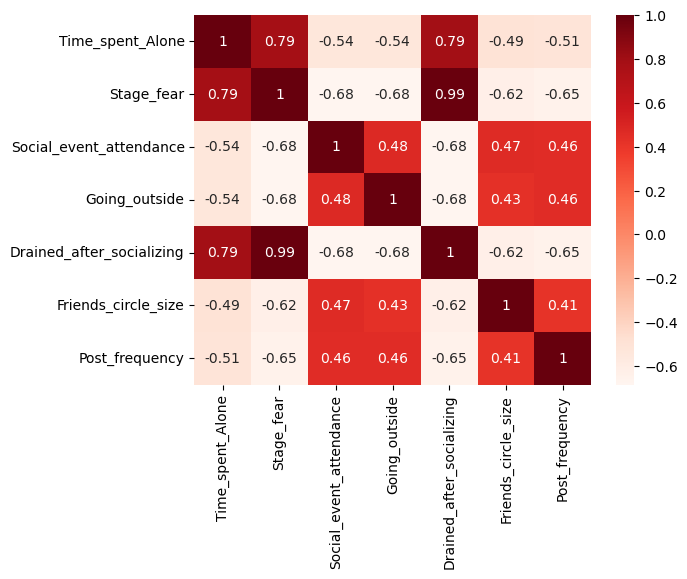

In [31]:
mydata_not_null = mydata_not_null.drop(columns=['id'])
sns.heatmap(mydata_not_null.corr(), annot=True, cmap='Reds')

<Axes: >

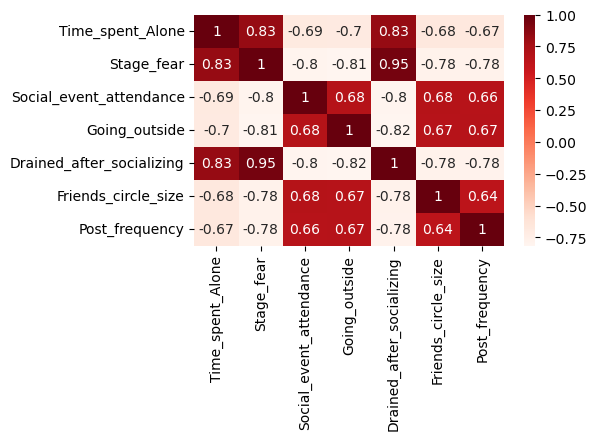

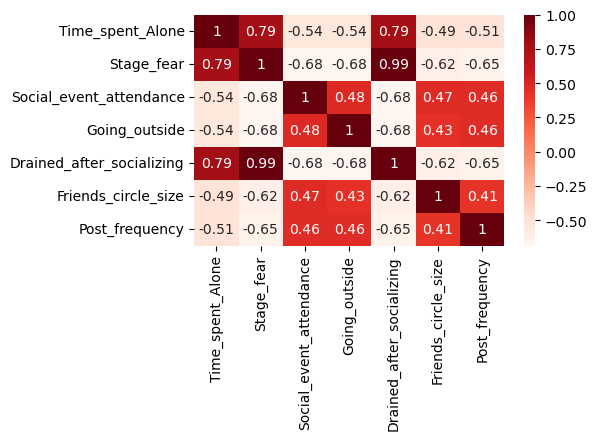

In [32]:
# comparing corrolation between null data filled by model and corr of original data wich had no nulls.
fig = plt.figure(figsize=(5, 3))
sns.heatmap(mydata_just_nulls.corr(), annot=True, cmap='Reds')
fig2 = plt.figure(figsize=(5, 3))
sns.heatmap(mydata_not_null.corr(), annot=True, cmap='Reds')

In [33]:
# Merge complete-case rows and model-imputed rows into one dataframe
# Ensure same column order
cols = list(mydata_not_null.columns)
mydata_filled_by_model = pd.concat(
    [mydata_not_null, mydata_just_nulls[cols]],
    axis=0
).sort_index()

# Optional quick check
# print(mydata_filled_by_model.shape)
# print(mydata_filled_by_model.isna().sum())

In [34]:
mydata_just_nulls.count()

Time_spent_Alone             8335
Stage_fear                   8335
Social_event_attendance      8335
Going_outside                8335
Drained_after_socializing    8335
Friends_circle_size          8335
Post_frequency               8335
dtype: int64

In [35]:
mydata_not_null.count()

Time_spent_Alone             10189
Stage_fear                   10189
Social_event_attendance      10189
Going_outside                10189
Drained_after_socializing    10189
Friends_circle_size          10189
Post_frequency               10189
dtype: int64

<Axes: >

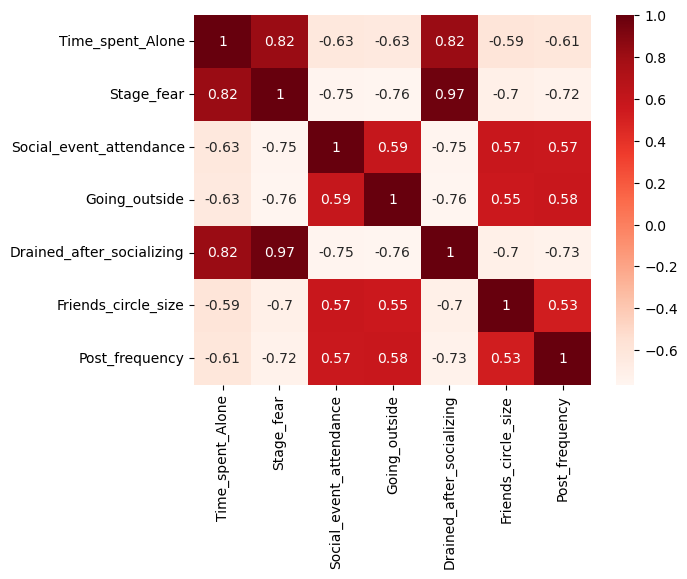

In [36]:
sns.heatmap(mydata_filled_by_model.corr(), annot=True, cmap='Reds')

we created our model and filled the null values in the data.saved dataframe as 'mydata_filled_by_model'.
lets fill the data using ranges and see the corr of columns and compare them.after that we can create models for each.

In [37]:
mydata.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Time_spent_Alone_labeled,Social_event_attendance_labeled,Going_outside_labeled,Friends_circle_size_labeled,Post_frequency_labeled,Stage_fear_labeled,Drained_after_socializing_labeled
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,Extrovert,Extrovert,Ambivert,Extrovert,Extrovert,Extrovert,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert,Introvert,Introvert,Introvert,Introvert,Introvert,Introvert,NaN
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,Extrovert,Extrovert,Ambivert,Extrovert,Extrovert,Extrovert,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert,Extrovert,Extrovert,Extrovert,Extrovert,NaN,Extrovert,Extrovert


as i said we are going to fill each column null values using other columns if the column value is availabel. the median(or for binary the exact value) label wich is repeated most in other columns is the choice,but we are keeping the risky rows to fill them seperately.
parts of our plan:
1. add two columns to the 'mydata' called (Extrovert_count,Introvert_count) and count the types of personality types in each rows in these columns(Time_spent_Alone_labeled	Social_event_attendance_labeled	Going_outside_labeled	Friends_circle_size_labeled	Post_frequency_labeled	Stage_fear_labeled	Drained_after_socializing_labeled).
2. fill the null values with most common type in each row using these two column((Extrovert_count,Introvert_count)).ecxept(risky_rows)
3. fill each type of personality with apropriate number(in continues with median of that type range of values and in binary columns with that type value.)
4. fill the 'risky_rows' null values in dataframe 'mydata' like this(if the number in these columns(Extrovert_count	Introvert_count) are equal --> fill half of the columns with introver and half of them with Extrovert value and if  one of them is higher fill the nulls with that type value.) 
5. creating a new dataset using just numerical data called(mydata_filled_by_label) and compare it with (mydata_filled_by_model). 

In [ ]:

risky_rows

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Time_spent_Alone_labeled,Social_event_attendance_labeled,Going_outside_labeled,Friends_circle_size_labeled,Post_frequency_labeled,Stage_fear_labeled,Drained_after_socializing_labeled,Extrovert_count,Introvert_count
372,372,4.0,Yes,3.0,3.0,Yes,4.0,3.0,Introvert,Ambivert,Ambivert,Ambivert,Ambivert,Ambivert,Introvert,Introvert,0,2
868,868,0.0,Yes,5.0,3.0,Yes,5.0,3.0,Introvert,Extrovert,Extrovert,Ambivert,Ambivert,Ambivert,Introvert,Introvert,2,2
945,945,10.0,No,3.0,3.0,No,5.0,3.0,Extrovert,Introvert,Ambivert,Ambivert,Ambivert,Ambivert,Extrovert,Extrovert,2,1
1059,1059,3.0,NaN,3.0,3.0,No,5.0,3.0,Extrovert,Extrovert,Ambivert,Ambivert,Ambivert,Ambivert,NaN,Extrovert,2,0
2214,2214,4.0,No,3.0,3.0,No,4.0,2.0,Extrovert,Ambivert,Ambivert,Ambivert,Ambivert,Introvert,Extrovert,Extrovert,2,1
2651,2651,NaN,Yes,3.0,3.0,NaN,4.0,2.0,Introvert,NaN,Ambivert,Ambivert,Ambivert,Introvert,Introvert,NaN,0,2
2809,2809,0.0,NaN,9.0,2.0,NaN,5.0,2.0,Extrovert,Extrovert,Extrovert,Introvert,Ambivert,Introvert,NaN,NaN,2,2
3760,3760,NaN,NaN,3.0,5.0,No,3.0,2.0,Extrovert,NaN,Ambivert,Extrovert,Introvert,Introvert,NaN,Extrovert,2,2
6066,6066,2.0,Yes,3.0,3.0,NaN,5.0,0.0,Extrovert,Extrovert,Ambivert,Ambivert,Ambivert,Introvert,Introvert,NaN,1,2
6483,6483,NaN,NaN,9.0,3.0,No,5.0,3.0,Extrovert,NaN,Extrovert,Ambivert,Ambivert,Ambivert,NaN,Extrovert,2,0


In [39]:
# Count Extrovert and Introvert occurrences across labeled columns for each row
labeled_cols = ['Time_spent_Alone_labeled', 'Social_event_attendance_labeled', 
                'Going_outside_labeled', 'Friends_circle_size_labeled', 
                'Post_frequency_labeled', 'Stage_fear_labeled', 
                'Drained_after_socializing_labeled']

mydata['Extrovert_count'] = mydata[labeled_cols].apply(lambda row: (row == 'Extrovert').sum(), axis=1)
mydata['Introvert_count'] = mydata[labeled_cols].apply(lambda row: (row == 'Introvert').sum(), axis=1)

In [40]:
# Fill null values based on the most common personality type in each row
# Skip risky_rows (identified by their indices)

# Get indices of risky rows to exclude them from filling
risky_indices = risky_rows.index

# Define median values for each personality type for continuous columns
extrovert_medians = {
    'Time_spent_Alone': 2,  # median of range 0-3
    'Social_event_attendance': 7,  # median of range 4-10
    'Going_outside': 5,  # median of range 4-7
    'Friends_circle_size': 10,  # median of range 6-15
    'Post_frequency': 7  # median of range 4-10
}

introvert_medians = {
    'Time_spent_Alone': 7,  # median of range 5-11
    'Social_event_attendance': 1,  # median of range 0-2
    'Going_outside': 1,  # median of range 0-2
    'Friends_circle_size': 2,  # median of range 0-3
    'Post_frequency': 1  # median of range 0-2
}

# Binary column mappings
extrovert_binary = {'Stage_fear': 'No', 'Drained_after_socializing': 'No'}
introvert_binary = {'Stage_fear': 'Yes', 'Drained_after_socializing': 'Yes'}

# Iterate through rows that are NOT risky
for idx in mydata.index:
    if idx in risky_indices:
        continue  # Skip risky rows
    
    row = mydata.loc[idx]
    extro_count = row['Extrovert_count']
    intro_count = row['Introvert_count']
    
    # Determine which personality type is more common
    if extro_count > intro_count:
        # Fill with Extrovert values
        for col, val in extrovert_medians.items():
            if pd.isna(row[col]):
                mydata.loc[idx, col] = float(val)
        for col, val in extrovert_binary.items():
            if pd.isna(row[col]):
                mydata.loc[idx, col] = val
    elif intro_count > extro_count:
        # Fill with Introvert values
        for col, val in introvert_medians.items():
            if pd.isna(row[col]):
                mydata.loc[idx, col] = float(val)
        for col, val in introvert_binary.items():
            if pd.isna(row[col]):
                mydata.loc[idx, col] = val
    # If counts are equal (extro_count == intro_count), leave nulls as is for now

print(f"Filled missing values for non-risky rows.")
print(f"Remaining null values in mydata:")
print(mydata[columns_to_predict].isnull().sum())

Filled missing values for non-risky rows.
Remaining null values in mydata:
Time_spent_Alone             10
Stage_fear                    8
Social_event_attendance       1
Going_outside                 5
Drained_after_socializing     7
Friends_circle_size           0
Post_frequency                2
dtype: int64


In [41]:
mydata.isna().sum()

id                                      0
Time_spent_Alone                       10
Stage_fear                              8
Social_event_attendance                 1
Going_outside                           5
Drained_after_socializing               7
Friends_circle_size                     0
Post_frequency                          2
Personality                             0
Time_spent_Alone_labeled             1190
Social_event_attendance_labeled      1180
Going_outside_labeled                1466
Friends_circle_size_labeled          1054
Post_frequency_labeled               1264
Stage_fear_labeled                   1893
Drained_after_socializing_labeled    1149
Extrovert_count                         0
Introvert_count                         0
dtype: int64

In [42]:
# Fill risky_rows null values based on Extrovert_count and Introvert_count
for idx in risky_rows.index:
    row = mydata.loc[idx]
    extro_count = row['Extrovert_count']
    intro_count = row['Introvert_count']
    
    # Get list of columns with null values for this row
    null_cols_continuous = [col for col in ['Time_spent_Alone', 'Social_event_attendance', 
                                             'Going_outside', 'Friends_circle_size', 'Post_frequency'] 
                           if pd.isna(row[col])]
    null_cols_binary = [col for col in ['Stage_fear', 'Drained_after_socializing'] 
                       if pd.isna(row[col])]
    
    total_nulls = len(null_cols_continuous) + len(null_cols_binary)
    
    if total_nulls == 0:
        continue
    
    if extro_count == intro_count:
        # Fill half with Extrovert, half with Introvert
        half = total_nulls // 2
        all_null_cols = null_cols_continuous + null_cols_binary
        
        # Fill first half with Extrovert values
        for i, col in enumerate(all_null_cols):
            if i < half:
                if col in extrovert_medians:
                    mydata.loc[idx, col] = float(extrovert_medians[col])
                elif col in extrovert_binary:
                    mydata.loc[idx, col] = extrovert_binary[col]
            else:
                # Fill second half with Introvert values
                if col in introvert_medians:
                    mydata.loc[idx, col] = float(introvert_medians[col])
                elif col in introvert_binary:
                    mydata.loc[idx, col] = introvert_binary[col]
    
    elif extro_count > intro_count:
        # Fill all with Extrovert values
        for col in null_cols_continuous:
            mydata.loc[idx, col] = float(extrovert_medians[col])
        for col in null_cols_binary:
            mydata.loc[idx, col] = extrovert_binary[col]
    
    else:  # intro_count > extro_count
        # Fill all with Introvert values
        for col in null_cols_continuous:
            mydata.loc[idx, col] = float(introvert_medians[col])
        for col in null_cols_binary:
            mydata.loc[idx, col] = introvert_binary[col]

print(f"Filled risky rows missing values.")
print(f"Remaining null values in mydata:")
print(mydata[columns_to_predict].isnull().sum())

Filled risky rows missing values.
Remaining null values in mydata:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               1
dtype: int64


In [43]:
# wwe got a sigle remaining null value and its better to fill it with Extrovert dou to the high sample size of extroverts.
mydata.loc[mydata['Post_frequency'].isnull(), 'Post_frequency'] = 7.0

print("Filled the last null value in Post_frequency with Extrovert median (7.0)")
print(f"Remaining null values: {mydata['Post_frequency'].isnull().sum()}")

Filled the last null value in Post_frequency with Extrovert median (7.0)
Remaining null values: 0


In [44]:
mydata_filled_by_label = mydata[['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']]

In [45]:
mydata_filled_by_label.replace({'No': 0, 'Yes': 1}, inplace=True)

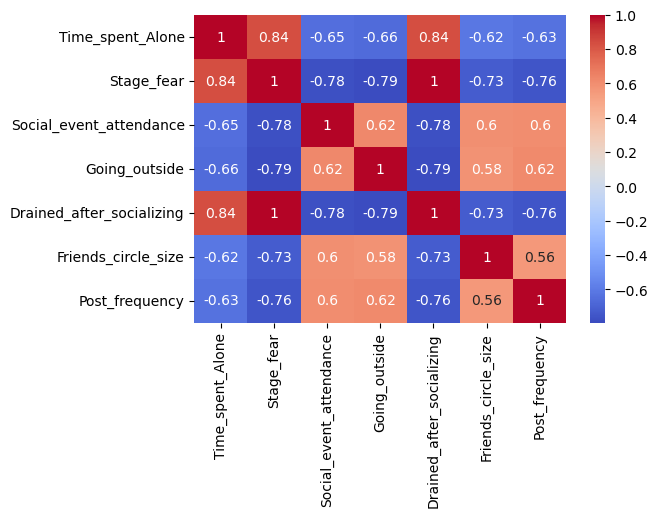

<Figure size 600x400 with 0 Axes>

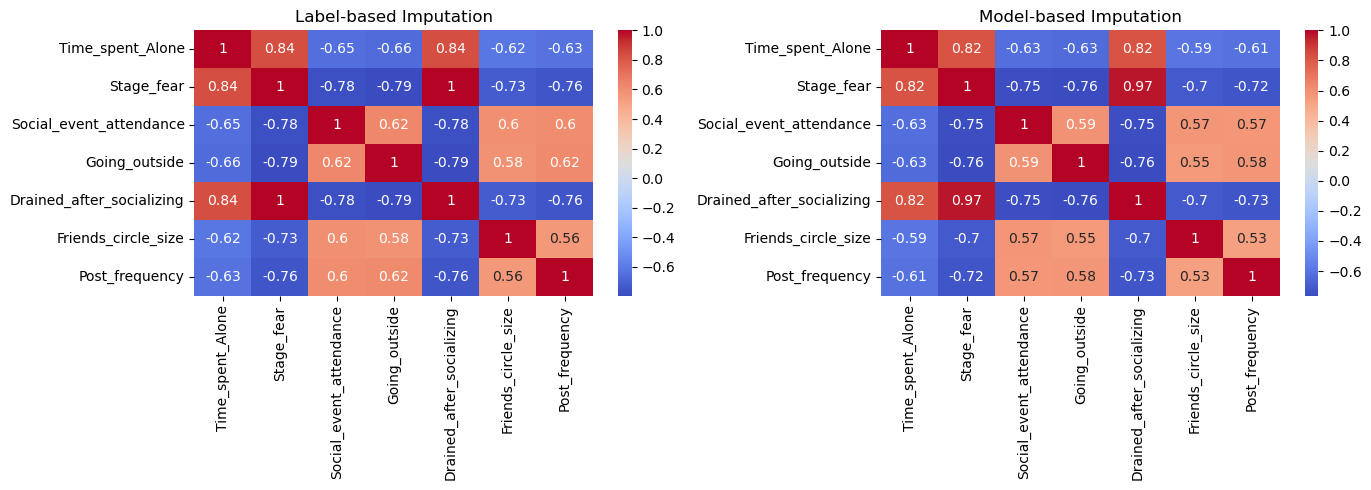

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(mydata_filled_by_label.corr(), annot=True, cmap='coolwarm')
plt.figure(figsize=(6, 4))
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(mydata_filled_by_label.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Label-based Imputation')
sns.heatmap(mydata_filled_by_model.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Model-based Imputation')
plt.tight_layout()

wow look at the defferences.i have no idea wich one will get the best accuracy.

# MODEL SELECTION
now its time to create model.two model for each dataset and see wichone will give us the best accuracy.
XGBoost and LogisticRegression model are good choices.
i think XGBoost will win this battle but we will try both.


# LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression

# Prepare X and y
X = mydata_filled_by_model.copy()
y = mydata['Personality']

# Fit logistic regression model
Log_model_for_data_fiiled_by_model = LogisticRegression(max_iter=1000, random_state=42)
Log_model_for_data_fiiled_by_model.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Hyperparameter tuning for Log_model_for_data_fiiled_by_model using train/test split


# Reuse X, y already defined; ensure no target leakage
X_lr = X.copy()
y_lr = y.copy()

# Train/test split (stratified)
X_tr, X_te, y_tr, y_te = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42, stratify=y_lr
)

# Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=5000, random_state=42))
])

# Param grid (two blocks for different solver capabilities)
param_grid = [
    {
        'clf__solver': ['lbfgs', 'newton-cg', 'sag'],
        'clf__penalty': ['l2'],
        'clf__C': [0.01, 0.1, 0.5, 1, 2, 5, 10],
        'clf__class_weight': [None, 'balanced']
    },
    {
        'clf__solver': ['saga'],
        'clf__penalty': ['l1', 'l2', 'elasticnet'],
        'clf__C': [0.01, 0.1, 0.5, 1, 2, 5, 10],
        'clf__l1_ratio': [0.15, 0.5, 0.85],
        'clf__class_weight': [None, 'balanced']
    }
]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid.fit(X_tr, y_tr)

best_lr = grid.best_estimator_
best_params = grid.best_params_
y_pred_lr = best_lr.predict(X_te)
y_proba_lr = best_lr.predict_proba(X_te)[:, 1]  # probability of class 'Introvert'

# Metrics
acc = accuracy_score(y_te, y_pred_lr)
bal_acc = balanced_accuracy_score(y_te, y_pred_lr)
roc = roc_auc_score((y_te == 'Introvert').astype(int), y_proba_lr)
report = classification_report(y_te, y_pred_lr, zero_division=0)
cm = confusion_matrix(y_te, y_pred_lr)

print("Best params:", best_params)
print(f"Accuracy: {acc:.9f}")
print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"ROC AUC: {roc:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

# Save tuned model reference
Log_model_for_data_fiiled_by_model_tuned = best_lr

Best params: {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}
Accuracy: 0.971929825
Balanced Accuracy: 0.9642
ROC AUC: 0.9622
Confusion Matrix:
 [[2686   54]
 [  50  915]]
Classification Report:
               precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2740
   Introvert       0.94      0.95      0.95       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



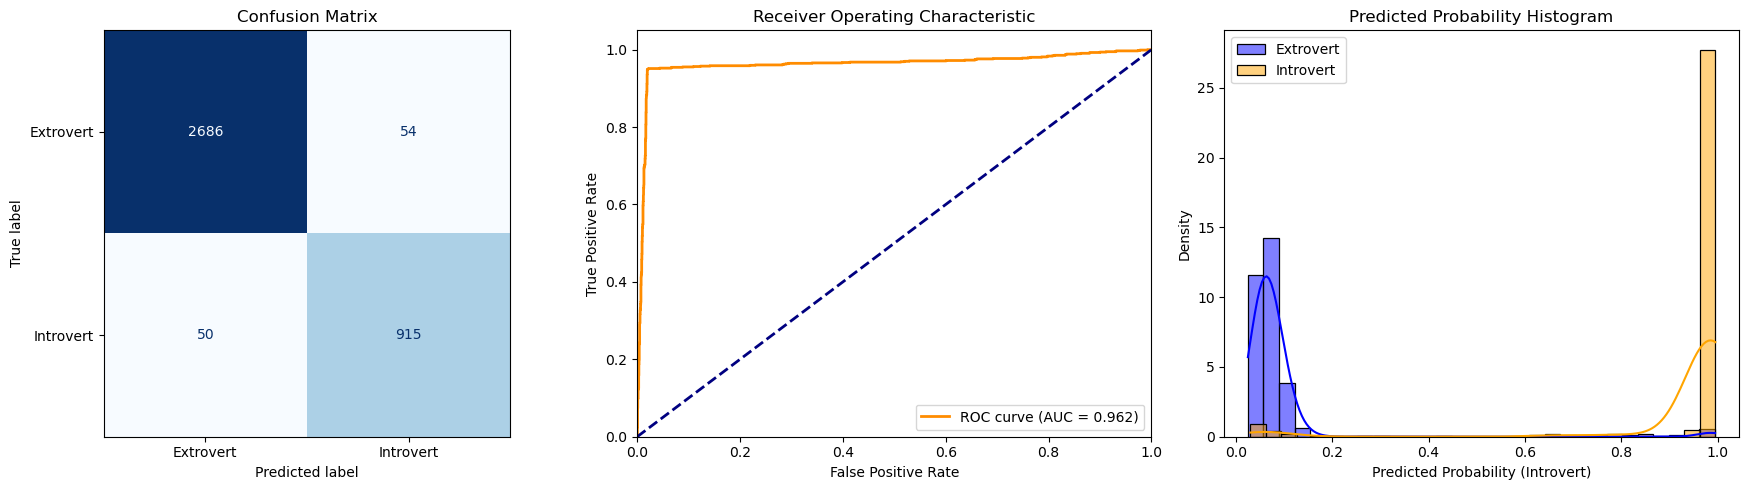

In [49]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

import matplotlib.pyplot as plt

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve((y_te == 'Introvert').astype(int), y_proba_lr)
roc_auc = auc(fpr, tpr)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix
cm = confusion_matrix(y_te, y_pred_lr, labels=['Extrovert', 'Introvert'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Extrovert', 'Introvert'])
disp.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Confusion Matrix')

# 2. ROC Curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic')
axes[1].legend(loc="lower right")

# 3. Probability Histogram
sns.histplot(y_proba_lr[y_te == 'Extrovert'], bins=30, color='blue', label='Extrovert', ax=axes[2], stat='density', kde=True)
sns.histplot(y_proba_lr[y_te == 'Introvert'], bins=30, color='orange', label='Introvert', ax=axes[2], stat='density', kde=True)
axes[2].set_title('Predicted Probability Histogram')
axes[2].set_xlabel('Predicted Probability (Introvert)')
axes[2].legend()

plt.tight_layout()
plt.show()

Best params (label-based): {'clf__C': 10, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'sag'}
Accuracy: 0.971929825
Balanced Accuracy: 0.9646
ROC AUC: 0.9657


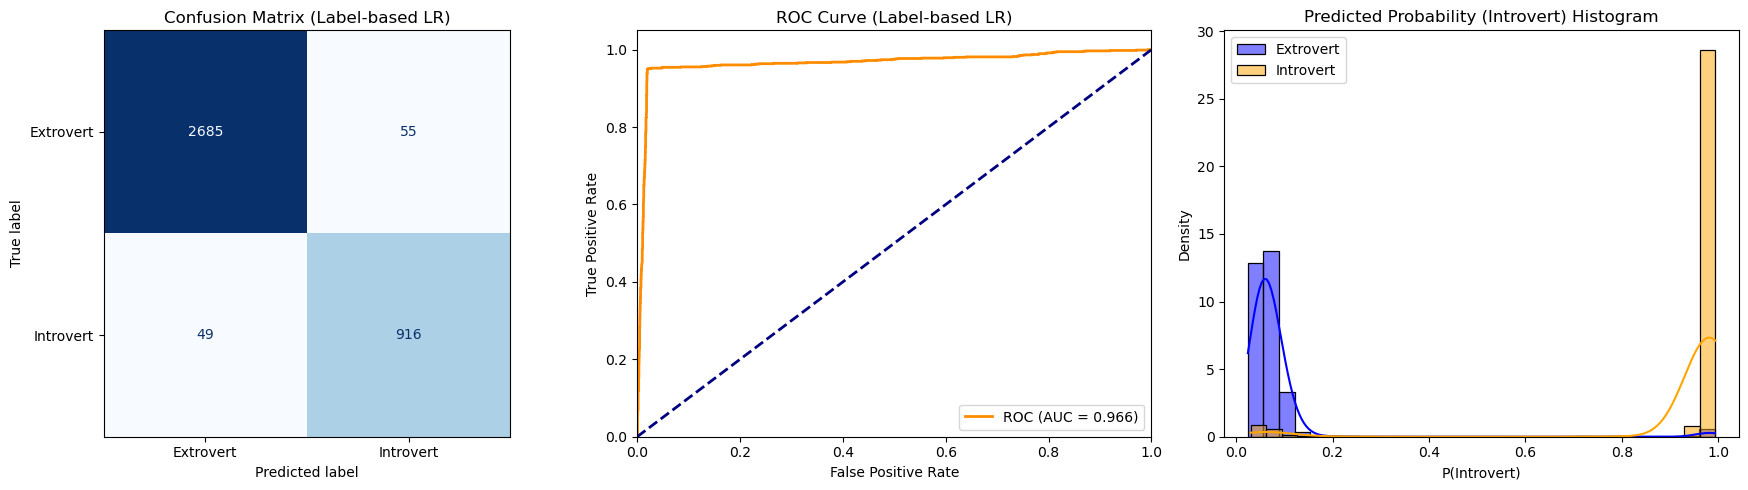

AUC: 0.965742
Accuracy: 0.971930
Balanced Accuracy: 0.964575


In [51]:
# Train LogisticRegression on mydata_filled_by_label first
X_lbl = mydata_filled_by_label.copy()
y_lbl = mydata['Personality'].copy()

# Train/test split
X_train_lbl, X_test_lbl, y_train_lbl, y_test_lbl = train_test_split(
	X_lbl, y_lbl, test_size=0.2, random_state=42, stratify=y_lbl
)

# Pipeline with hyperparameter tuning
pipe_lbl = Pipeline([
	('scaler', StandardScaler()),
	('clf', LogisticRegression(max_iter=5000, random_state=42))
])

grid_lbl = GridSearchCV(
	pipe_lbl,
	param_grid,  # reuse param_grid from previous cell
	cv=cv,  # reuse cv from previous cell
	scoring='roc_auc',
	n_jobs=-1,
	verbose=0
)

grid_lbl.fit(X_train_lbl, y_train_lbl)

best_lr_lbl = grid_lbl.best_estimator_
y_pred_lbl = best_lr_lbl.predict(X_test_lbl)
y_proba_lbl = best_lr_lbl.predict_proba(X_test_lbl)[:, 1]

print("Best params (label-based):", grid_lbl.best_params_)
print(f"Accuracy: {accuracy_score(y_test_lbl, y_pred_lbl):.9f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_lbl, y_pred_lbl):.4f}")
print(f"ROC AUC: {roc_auc_score((y_test_lbl == 'Introvert').astype(int), y_proba_lbl):.4f}")

# Visualization for LogisticRegression on mydata_filled_by_label
# Confusion Matrix
cm_lbl = confusion_matrix(y_test_lbl, y_pred_lbl, labels=['Extrovert', 'Introvert'])
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

disp_lbl = ConfusionMatrixDisplay(confusion_matrix=cm_lbl, display_labels=['Extrovert', 'Introvert'])
disp_lbl.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Confusion Matrix (Label-based LR)')

# ROC Curve
fpr_lbl, tpr_lbl, thresholds_lbl = roc_curve((y_test_lbl == 'Introvert').astype(int), y_proba_lbl)
roc_auc_lbl = auc(fpr_lbl, tpr_lbl)

axes[1].plot(fpr_lbl, tpr_lbl, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc_lbl:.3f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Label-based LR)')
axes[1].legend(loc="lower right")

# Predicted Probability Histogram (Introvert probability)
sns.histplot(y_proba_lbl[y_test_lbl == 'Extrovert'], bins=30, color='blue', label='Extrovert', ax=axes[2], stat='density', kde=True)
sns.histplot(y_proba_lbl[y_test_lbl == 'Introvert'], bins=30, color='orange', label='Introvert', ax=axes[2], stat='density', kde=True)
axes[2].set_title('Predicted Probability (Introvert) Histogram')
axes[2].set_xlabel('P(Introvert)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Keep numeric results
print(f"AUC: {roc_auc_lbl:.6f}")
print(f"Accuracy: {accuracy_score(y_test_lbl, y_pred_lbl):.6f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test_lbl, y_pred_lbl):.6f}")


 we can see the accuracy of each(model and label filled) dataset and they have difference in just two predictions.
 im shocked a little and can not waith to see if there will be the same in XGBoost too or what?

Note: you may need to restart the kernel to use updated packages.
Training XGBoost model with hyperparameter tuning...
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits

XGBoost Model Results (Label-based Imputation)
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'scale_pos_weight': 2, 'subsample': 0.8}
Accuracy:  0.971390
Balanced Accuracy: 0.9642
ROC AUC: 0.9737

Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2740
   Introvert       0.94      0.95      0.95       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



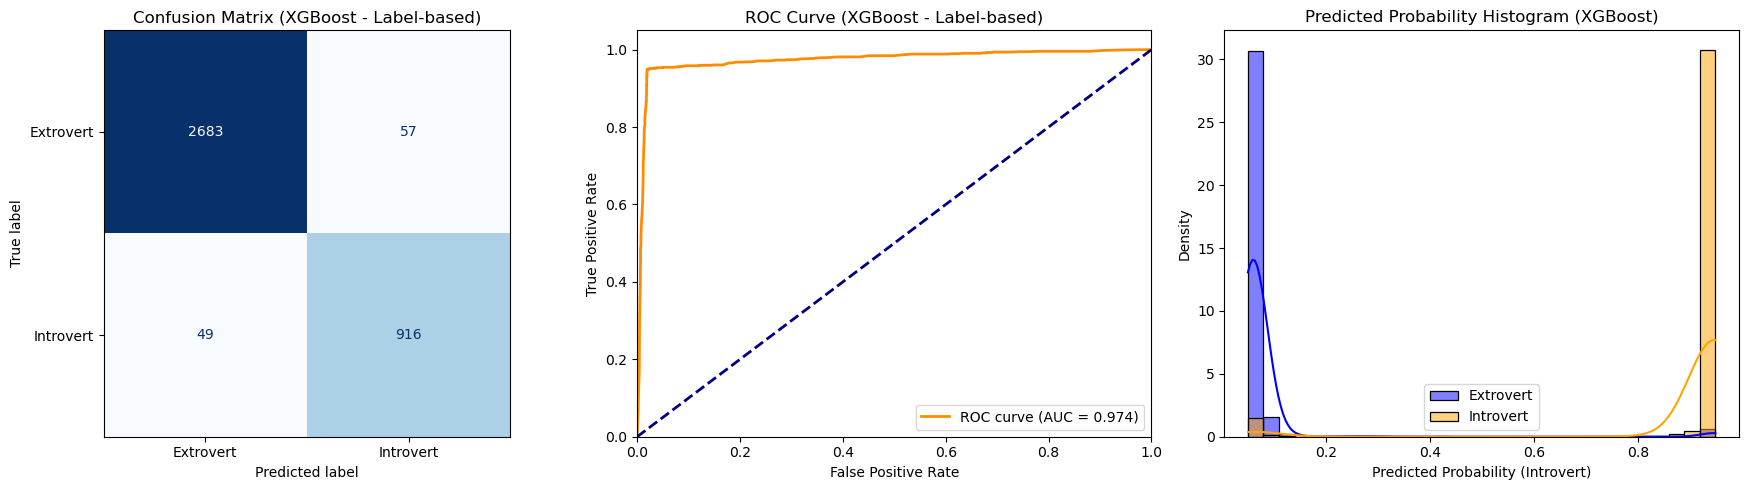

In [56]:
%pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare data
X_xgb_lbl = mydata_filled_by_label.copy()
y_xgb_lbl = mydata['Personality'].copy()

# Encode target variable (XGBoost needs numeric labels)
y_xgb_encoded = (y_xgb_lbl == 'Introvert').astype(int)

# Train/test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_xgb_lbl, y_xgb_encoded, test_size=0.2, random_state=42, stratify=y_xgb_encoded
)

# XGBoost with hyperparameter tuning
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3]  # handle class imbalance
}

grid_xgb = GridSearchCV(
    xgb_model,
    param_grid_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("Training XGBoost model with hyperparameter tuning...")
grid_xgb.fit(X_train_xgb, y_train_xgb)

# Best model
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_xgb)
y_proba_xgb = best_xgb.predict_proba(X_test_xgb)[:, 1]

# Convert predictions back to original labels for classification report
y_test_xgb_labels = ['Introvert' if y == 1 else 'Extrovert' for y in y_test_xgb]
y_pred_xgb_labels = ['Introvert' if y == 1 else 'Extrovert' for y in y_pred_xgb]

# Metrics
acc_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
bal_acc_xgb = balanced_accuracy_score(y_test_xgb, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test_xgb, y_proba_xgb)

print("\n" + "="*80)
print("XGBoost Model Results (Label-based Imputation)")
print("="*80)
print(f"Best parameters: {grid_xgb.best_params_}")
print(f"Accuracy: {acc_xgb:9f}")
print(f"Balanced Accuracy: {bal_acc_xgb:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_xgb_labels, y_pred_xgb_labels, zero_division=0))

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix
cm_xgb = confusion_matrix(y_test_xgb_labels, y_pred_xgb_labels, labels=['Extrovert', 'Introvert'])
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Extrovert', 'Introvert'])
disp_xgb.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Confusion Matrix (XGBoost - Label-based)')

# 2. ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_xgb, y_proba_xgb)
roc_auc_val = auc(fpr_xgb, tpr_xgb)

axes[1].plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.3f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (XGBoost - Label-based)')
axes[1].legend(loc="lower right")

# 3. Predicted Probability Histogram
sns.histplot(y_proba_xgb[y_test_xgb == 0], bins=30, color='blue', label='Extrovert', ax=axes[2], stat='density', kde=True)
sns.histplot(y_proba_xgb[y_test_xgb == 1], bins=30, color='orange', label='Introvert', ax=axes[2], stat='density', kde=True)
axes[2].set_title('Predicted Probability Histogram (XGBoost)')
axes[2].set_xlabel('Predicted Probability (Introvert)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Save model reference
XGBoost_model_for_label_based = best_xgb

Training XGBoost model on model-based imputation data with hyperparameter tuning...
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits

XGBoost Model Results (Model-based Imputation)
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 1.0}
Accuracy: 0.97112
Balanced Accuracy: 0.96369
ROC AUC: 0.97246

Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2740
   Introvert       0.94      0.95      0.94       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



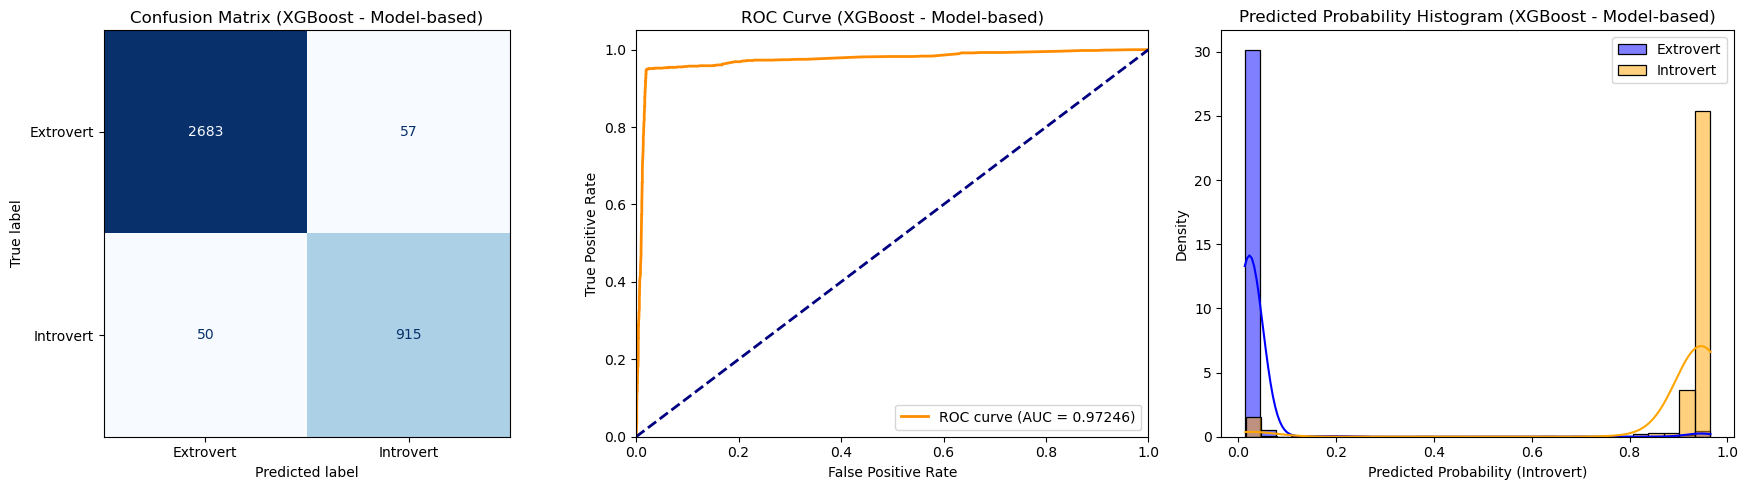


Final Metrics:
AUC: 0.97246
Accuracy: 0.97112
Balanced Accuracy: 0.96369


In [57]:
# Train XGBoost on mydata_filled_by_model dataset
X_xgb_model = mydata_filled_by_model.copy()
y_xgb_model = mydata['Personality'].copy()

# Encode target variable (XGBoost needs numeric labels)
y_xgb_model_encoded = (y_xgb_model == 'Introvert').astype(int)

# Train/test split
X_train_xgb_model, X_test_xgb_model, y_train_xgb_model, y_test_xgb_model = train_test_split(
    X_xgb_model, y_xgb_model_encoded, test_size=0.2, random_state=42, stratify=y_xgb_model_encoded
)

# XGBoost with hyperparameter tuning
xgb_model_filled = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

param_grid_xgb_model = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3]
}

grid_xgb_model = GridSearchCV(
    xgb_model_filled,
    param_grid_xgb_model,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("Training XGBoost model on model-based imputation data with hyperparameter tuning...")
grid_xgb_model.fit(X_train_xgb_model, y_train_xgb_model)

# Best model
best_xgb_model = grid_xgb_model.best_estimator_
y_pred_xgb_model = best_xgb_model.predict(X_test_xgb_model)
y_proba_xgb_model = best_xgb_model.predict_proba(X_test_xgb_model)[:, 1]

# Convert predictions back to original labels for classification report
y_test_xgb_model_labels = ['Introvert' if y == 1 else 'Extrovert' for y in y_test_xgb_model]
y_pred_xgb_model_labels = ['Introvert' if y == 1 else 'Extrovert' for y in y_pred_xgb_model]

# Metrics
acc_xgb_model = accuracy_score(y_test_xgb_model, y_pred_xgb_model)
bal_acc_xgb_model = balanced_accuracy_score(y_test_xgb_model, y_pred_xgb_model)
roc_auc_xgb_model = roc_auc_score(y_test_xgb_model, y_proba_xgb_model)

print("\n" + "="*80)
print("XGBoost Model Results (Model-based Imputation)")
print("="*80)
print(f"Best parameters: {grid_xgb_model.best_params_}")
print(f"Accuracy: {acc_xgb_model:.5f}")
print(f"Balanced Accuracy: {bal_acc_xgb_model:.5f}")
print(f"ROC AUC: {roc_auc_xgb_model:.5f}")
print("\nClassification Report:")
print(classification_report(y_test_xgb_model_labels, y_pred_xgb_model_labels, zero_division=0))

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix
cm_xgb_model = confusion_matrix(y_test_xgb_model_labels, y_pred_xgb_model_labels, labels=['Extrovert', 'Introvert'])
disp_xgb_model = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_model, display_labels=['Extrovert', 'Introvert'])
disp_xgb_model.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Confusion Matrix (XGBoost - Model-based)')

# 2. ROC Curve
fpr_xgb_model, tpr_xgb_model, _ = roc_curve(y_test_xgb_model, y_proba_xgb_model)
roc_auc_val_model = auc(fpr_xgb_model, tpr_xgb_model)

axes[1].plot(fpr_xgb_model, tpr_xgb_model, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val_model:.5f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (XGBoost - Model-based)')
axes[1].legend(loc="lower right")

# 3. Predicted Probability Histogram
sns.histplot(y_proba_xgb_model[y_test_xgb_model == 0], bins=30, color='blue', label='Extrovert', ax=axes[2], stat='density', kde=True)
sns.histplot(y_proba_xgb_model[y_test_xgb_model == 1], bins=30, color='orange', label='Introvert', ax=axes[2], stat='density', kde=True)
axes[2].set_title('Predicted Probability Histogram (XGBoost - Model-based)')
axes[2].set_xlabel('Predicted Probability (Introvert)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Save model reference
XGBoost_model_for_model_based = best_xgb_model

# Print numeric results with 5 decimals
print(f"\nFinal Metrics:")
print(f"AUC: {roc_auc_xgb_model:.5f}")
print(f"Accuracy: {acc_xgb_model:.5f}")
print(f"Balanced Accuracy: {bal_acc_xgb_model:.5f}")

In [58]:
# Collect accuracy scores for all four models

# 1. Logistic Regression (model-based imputation)
acc_lr_model = accuracy_score(y_te, y_pred_lr)

# 2. Logistic Regression (label-based imputation)
acc_lr_label = accuracy_score(y_test_lbl, y_pred_lbl)

# 3. XGBoost (label-based imputation)
acc_xgb_label = accuracy_score(y_test_xgb, y_pred_xgb)

# 4. XGBoost (model-based imputation)
acc_xgb_model = accuracy_score(y_test_xgb_model, y_pred_xgb_model)

# Print comparison
print("Model Accuracy Comparison:")
print(f"Logistic Regression (model-based imputation): {acc_lr_model:.5f}")
print(f"Logistic Regression (label-based imputation): {acc_lr_label:.5f}")
print(f"XGBoost (label-based imputation):            {acc_xgb_label:.5f}")
print(f"XGBoost (model-based imputation):            {acc_xgb_model:.5f}")

Model Accuracy Comparison:
Logistic Regression (model-based imputation): 0.97193
Logistic Regression (label-based imputation): 0.97193
XGBoost (label-based imputation):            0.97139
XGBoost (model-based imputation):            0.97112


# Models comparing with each other:
as we can see the winner is LogisticRegression but we may see differences when we apload our models in Kaggle.
i learned a lot from this comptition and i hope this note helps you to.
fill free to contact me if you found an emission(of course you will) or had a question about the note,etc...